In [1]:
import numpy as np

#Create table
from prettytable import PrettyTable

#Read csv
import pandas as pd

#Gegnerate ROC curve graph
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [37]:
##Confronto tra final_test_naive_bayes e test_target
##Confronto tra final_test_our_nb e test_target
##Confronto tra target_r e test_target

data_naive = pd.read_csv("./csv/final_test_naive_bayes.csv")
data_our_nb = pd.read_csv("./csv/final_test_our_nb.csv")
data_views_target_r = pd.read_csv("./csv/views_target_r.csv")
data_test_target = pd.read_csv("./csv/test_target.csv")

##Colonne target dei tre file csv  
column_naive = data_naive['target'].values
column_our_nb = data_our_nb['target'].values
column_views_target_r = data_views_target_r['target'].values
column_test_target = data_test_target['target'].values

column_test = []
binary_naive = []
binary_our_nb = []
binary_views_target_r = []
binary_test = []

for i in range(len(column_test_target)):
    column_test.append(column_test_target[i][1:])
    
    if column_naive[i] == "good":
        binary_naive.append(1)
    else:
        binary_naive.append(0)
    
    if column_our_nb[i] == "good":
        binary_our_nb.append(1)
    else:
        binary_our_nb.append(0)

    if column_views_target_r[i] == "good":
        binary_views_target_r.append(1)
    else:
        binary_views_target_r.append(0)

    if column_test_target[i] == " good":
        binary_test.append(1)
        
    else:
        binary_test.append(0)
    
#print(column_naive)
#print(column_our_nb)
#print(column_views_target_r)
#print(column_test)

In [3]:
##Funzione per generare la matrice di confusione date le colonne target
def create_confusion_matrix(predicted, testing):
    
    true_positive = 0
    false_negative = 0
    false_positive = 0
    true_negative = 0
    i = 0
    
    for i in range(len(predicted)):
        
        if testing[i] == " good" and predicted[i] == "good":
            true_positive += 1
            
        elif testing[i] == " good" and predicted[i] == "bad":
            false_negative += 1
            
        elif testing[i] == " bad" and predicted[i] == "good":
            false_positive += 1
            
        elif testing[i] == " bad" and predicted[i] == "bad":
            true_negative += 1

    #print(true_positive)
    #print(false_negative)
    #print(false_positive)
    #print(true_negative)
    
    return true_positive, false_negative, false_positive, true_negative

In [4]:
##Funzione per calcolare accuracy, precision, recall, f-measure, specificity e roc curve 

def performance_unit(confusion_matrix, binary):
    
    true_positive = confusion_matrix[0]
    false_negative = confusion_matrix[1]
    false_positive = confusion_matrix[2]
    true_negative = confusion_matrix[3]
    
    #print(true_positive)
    #print(false_negative)
    #print(false_positive)
    #print(true_negative)
    
    accuracy = (float)(true_positive + true_negative) / (float)(true_positive + false_negative + false_positive + true_negative)
    precision = (float)(true_positive) / (float)(true_positive + false_positive)
    recall = (float)(true_positive) / (float)(true_positive + false_negative)
    fmeasure = (float)(2 * precision * recall) / (float)(precision + recall)
    
    ##VIENE UGUALE ALLA F-MEASURE
    specificity = (float)(true_negative) / (float)(true_negative + false_positive)
    FP_rate = (float)(false_positive) / (float)(true_negative + false_positive)
    
    print("Accuracy = " + str(accuracy))
    print("Precision = " + str(precision))
    print("Recall = " + str(recall))
    print("F-measure = " + str(fmeasure))
    print("Specificity = " + str(specificity))
    
    print_roc_curve()
    

In [8]:
##Funzione per grafico ROC-curve ed AUC
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
# roc curve and auc score
from sklearn.datasets import make_classification  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.model_selection import train_test_split  
from sklearn.metrics import roc_curve  
from sklearn.metrics import roc_auc_score
import csv

def plot_roc_curve(fpr, tpr):  
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [19]:
with open('./probs/probs.csv', 'r') as csvfile:
    naive_assun = []
    for row in csv.reader(csvfile, delimiter=';'):
        naive_assun.append(float(row[0]))
naive_assun

[0.200636852805,
 2.87868863968e-07,
 0.84260814423,
 7.27429698633e-06,
 0.000588726831329,
 4.09266172174e-07,
 8.09025055504e-07,
 0.983117000816,
 0.269625087207,
 0.748372731078,
 0.340249001542,
 0.0326100454907,
 0.00260184239426,
 0.00121965147577,
 0.00636232593145,
 7.4636105063e-07,
 1.57112791666e-07,
 1.80570739472e-08,
 0.288899859876,
 1.80570739472e-08,
 0.00395911548399,
 5.66448297212e-06,
 2.32728296523e-07,
 0.000558644163268,
 0.893391621468,
 1.80570739472e-08,
 0.0254412921361,
 0.0683557728732,
 0.483225921743,
 0.00229613580337,
 0.0768843638371,
 0.172142357085,
 3.09016756812e-05,
 1.15556353399e-05,
 0.560632366457,
 3.27929870025e-06,
 0.227837796321,
 0.0152597104397,
 0.825458900085,
 0.983117000816,
 0.912758213509,
 0.975131363822,
 0.95310423224,
 0.643366559089,
 0.505473280557,
 0.204244634678,
 0.872005903757,
 0.0876288838748,
 0.916724214501,
 0.928520566995,
 0.541005511013,
 0.60503515805,
 0.983117000816,
 0.983117000816,
 0.983117000816,
 0.97

In [17]:
'''
cm_naive = create_confusion_matrix(column_naive, column_test_target)
cm_our_nb = create_confusion_matrix(column_our_nb, column_test_target)
cm_views_target_r = create_confusion_matrix(column_views_target_r, column_test_target)

performance_unit(cm_naive, binary_naive)
performance_unit(cm_our_nb, binary_our_nb)
performance_unit(cm_views_target_r, binary_views_target_r)
'''

'\ncm_naive = create_confusion_matrix(column_naive, column_test_target)\ncm_our_nb = create_confusion_matrix(column_our_nb, column_test_target)\ncm_views_target_r = create_confusion_matrix(column_views_target_r, column_test_target)\n\nperformance_unit(cm_naive, binary_naive)\nperformance_unit(cm_our_nb, binary_our_nb)\nperformance_unit(cm_views_target_r, binary_views_target_r)\n'

In [39]:
auc = roc_auc_score(binary_test, naive_assun)  
print('AUC: %.2f' % auc)  

AUC: 0.94


In [40]:
fpr, tpr, thresholds = roc_curve(binary_naive, naive_assun)  

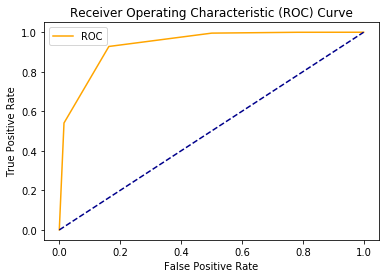

In [41]:
plot_roc_curve(fpr, tpr)  

In [42]:
with open('./probs/probs_mybn.csv', 'r') as csvfile:
    naive_assun = []
    for row in csv.reader(csvfile, delimiter=';'):
        naive_assun.append(float(row[0]))
naive_assun

[0.990687823573,
 0.00482160077145,
 0.990687823573,
 0.00482160077145,
 0.0518653321202,
 0.00482160077145,
 0.00482160077145,
 0.990687823573,
 0.926790801791,
 0.990687823573,
 0.990687823573,
 0.926790801791,
 0.0518653321202,
 0.926790801791,
 0.0518653321202,
 0.00482160077145,
 0.00482160077145,
 0.00482160077145,
 0.408214690689,
 0.00482160077145,
 0.0518653321202,
 0.0518653321202,
 0.00482160077145,
 0.0518653321202,
 0.926790801791,
 0.00482160077145,
 0.0518653321202,
 0.0518653321202,
 0.408214690689,
 0.0518653321202,
 0.926790801791,
 0.408214690689,
 0.408214690689,
 0.00482160077145,
 0.926790801791,
 0.00482160077145,
 0.408214690689,
 0.408214690689,
 0.990687823573,
 0.990687823573,
 0.926790801791,
 0.926790801791,
 0.990687823573,
 0.926790801791,
 0.408214690689,
 0.926790801791,
 0.926790801791,
 0.408214690689,
 0.990687823573,
 0.926790801791,
 0.990687823573,
 0.990687823573,
 0.990687823573,
 0.990687823573,
 0.990687823573,
 0.926790801791,
 0.990687823573

In [45]:
auc = roc_auc_score(binary_test, naive_assun)  
print('AUC: %.2f' % auc)  

AUC: 0.94


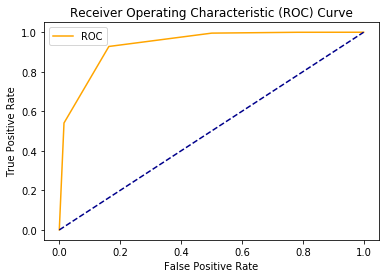

In [47]:
fpr, tpr, thresholds = roc_curve(binary_naive, naive_assun)  
plot_roc_curve(fpr, tpr)  